In [9]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
# Memuat file csv
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:
# Mengubah nama kolom-kolom
df = df.rename(columns = {'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# Mengubah data kategorik menjadi numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [11]:
# Membuang kolom yang tidak diperlukan 
X = df.drop(['CustomerID', 'gender'], axis=1)
# Membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

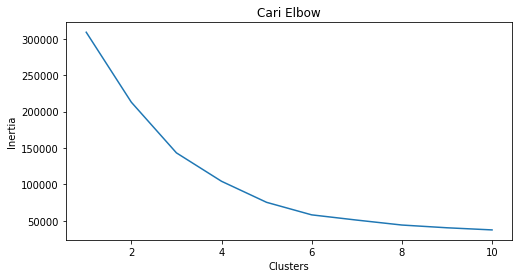

In [12]:
# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(list(range(1, 11)), clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
# Berdasarkan elbow, jumlah cluster optimum = 5

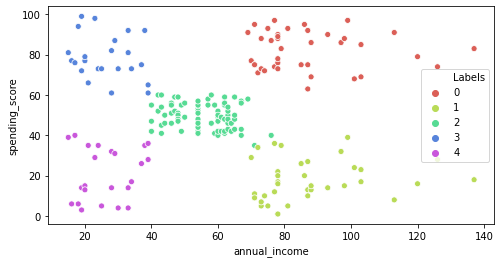

In [13]:
# Membuat objek KMeans dengan 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# Membuat plot untuk 5 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.show()